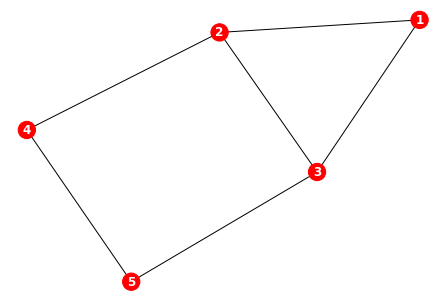

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

## create graph

nodes = [1,2,3,4,5]
edges = {'1': [2, 3], '2':[1, 3, 4], '3':[1, 2, 5], '4': [2, 5],'5':[3, 4]}
colors = ['r']*len(nodes)

#######


e = []
for i in edges:
  for j in edges[i]:
    if int(i)<j:
      e.append((int(i) ,j))

G=nx.Graph() 
G.add_nodes_from(nodes)
G.add_edges_from(e)

nx.draw(G, with_labels=True,node_color=colors, font_weight='bold',font_color='white')
plt.show(); 

In [ ]:
import math
  
def powerset(fullset):
  listrep = list(fullset)
  subsets = []
  for i in range(2**len(listrep)):
    subset = []
    for k in range(len(listrep)):            
      if i & 1<<k:
        subset.append(listrep[k])
    subsets.append(subset)        
  return subsets

a = list(powerset(nodes))[1:-1]
b = list(reversed(list(powerset(nodes))[1:-1]))
all_p = list(zip(a,b))

In [ ]:
best_value = 0
best_cut = 0

for p in all_p: 
  value1 = 0
  checklist1 = []
  for i in p[0]:
    for j in edges[str(i)]:
      if j in p[0]:
        checklist1.append(j)
    if i in checklist1:
      continue
    value1 += 1

  value2 = 0
  checklist2 = []
  for i in p[1]: 
    for j in edges[str(i)]:
      if j in p[1]:
        checklist2.append(j)
    if i in checklist2:
      continue
    value2 += 1
  
  if sum([value1, value2])> best_value:
    best_value = sum([value1, value2])
    best_cut = p
  #print('Cut : ',p, '  -  Value : ',sum([value1, value2]))
print('Cut : ',best_cut, '  -  Value : ', best_value)

Cut :  ([3, 4], [1, 2, 5])   -  Value :  4


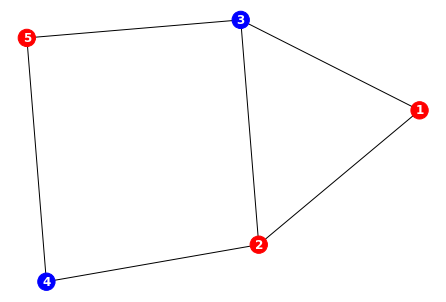

In [ ]:
for c in best_cut[0]:
  colors[c-1] = 'b'

G=nx.Graph() 
G.add_nodes_from(nodes)
G.add_edges_from(e)

nx.draw(G, with_labels=True,node_color=colors, font_weight='bold',font_color='white')
plt.show(); 